In [1]:
library (tree )
library (ISLR )

#### Carseats data set
Sales is a continuous variable, and so we begin by recoding it as a binary variable. We use the ifelse() function to create a variable, called ifelse() High, which takes on a value of Yes if the Sales variable exceeds 8, and takes on a value of No otherwise.

In [2]:
attach ( Carseats )
High = ifelse (Sales <=8 ," No"," Yes ")

Finally, we use the data.frame() function to merge High with the rest of the Carseats data.

In [4]:
Carseats = data.frame (Carseats, High)

We now use the tree() function to fit a classification tree in order to predict tree() High using all variables but Sales. The syntax of the tree() function is quite similar to that of the lm() function.

In [11]:
Carseats

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4.15,141,64,3,340,128,Bad,38,13,Yes,No,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes,Yes
6.63,115,105,0,45,108,Medium,71,15,Yes,No,No
11.85,136,81,15,425,120,Good,67,10,Yes,Yes,Yes
6.54,132,110,0,108,124,Medium,76,10,No,No,No


In [9]:
tree.carseats = tree(High~.-Sales, Carseats)

In [10]:
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

 A small deviance indicates a tree that provides a good fit to the (training) data. The residual mean deviance reported is simply the deviance divided by n−|T0|, which in this case is 400−27 = 373.

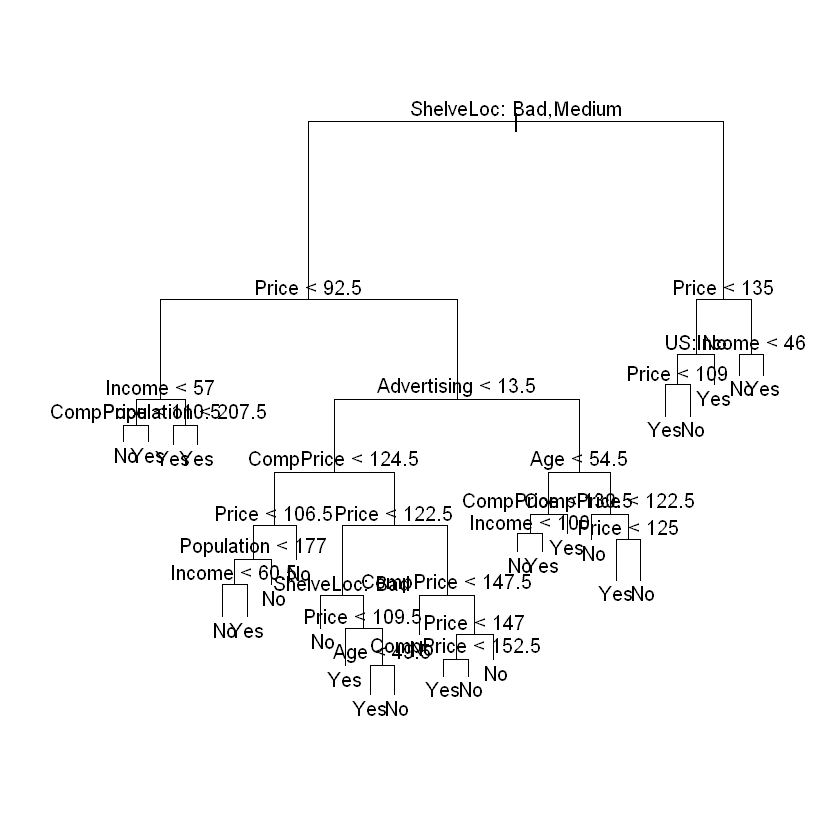

In [14]:
plot(tree.carseats)
text(tree.carseats, pretty=0)#The argument pretty=0 instructs R to include the category names for any qualitative predictors, rather than simply displaying a letter for each category

In order to properly evaluate the performance of a classification tree on these data, we must estimate the test error rather than simply computing the training error. We split the observations into a training set and a test set, build the tree using the training set, and evaluate its performance on the test data. The predict() function can be used for this purpose. In the case of a classification tree, the argument type="class" instructs R to return the actual class prediction. This approach leads to correct predictions for around 71.5 % of the locations in the test data set.

In [18]:
set.seed (2)
train = sample (1: nrow( Carseats ), 200)
Carseats.test= Carseats[-train ,]
High.test =High[- train ]
tree.carseats =tree(High~.-Sales, Carseats , subset =train )
tree.pred = predict(tree.carseats, Carseats.test ,type ="class")
table(tree.pred ,High.test)

         High.test
tree.pred  No  Yes 
     No   104    33
     Yes   13    50

Next, we consider whether pruning the tree might lead to improved results. The function cv.tree() performs cross-validation in order to determine the optimal level of tree complexity; cost complexity pruning is used in order to select a sequence of trees for consideration. We use the argument FUN=prune.misclass in order to indicate that we want the classification error rate to guide the cross-validation and pruning process, rather than the default for the cv.tree() function, which is deviance. The cv.tree() function reports the number of terminal nodes of each tree considered (size) as well as the corresponding error rate and the value of the cost-complexity parameter used (k, which corresponds to α).

In [20]:
set.seed (3)
cv.carseats =cv.tree(tree.carseats, FUN = prune.misclass)
names(cv.carseats)
cv.carseats #dev:cv error rate

[1] "size"   "dev"    "k"      "method"

$size
[1] 21 19 14  9  8  5  3  2  1

$dev
[1] 74 76 81 81 75 77 78 85 81

$k
[1] -Inf  0.0  1.0  1.4  2.0  3.0  4.0  9.0 18.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

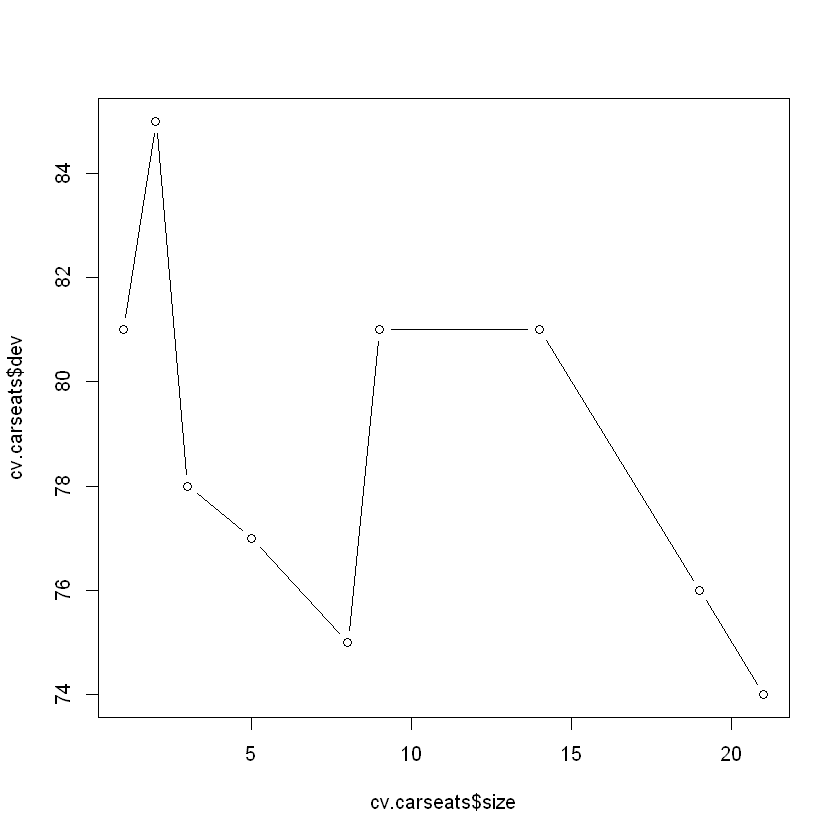

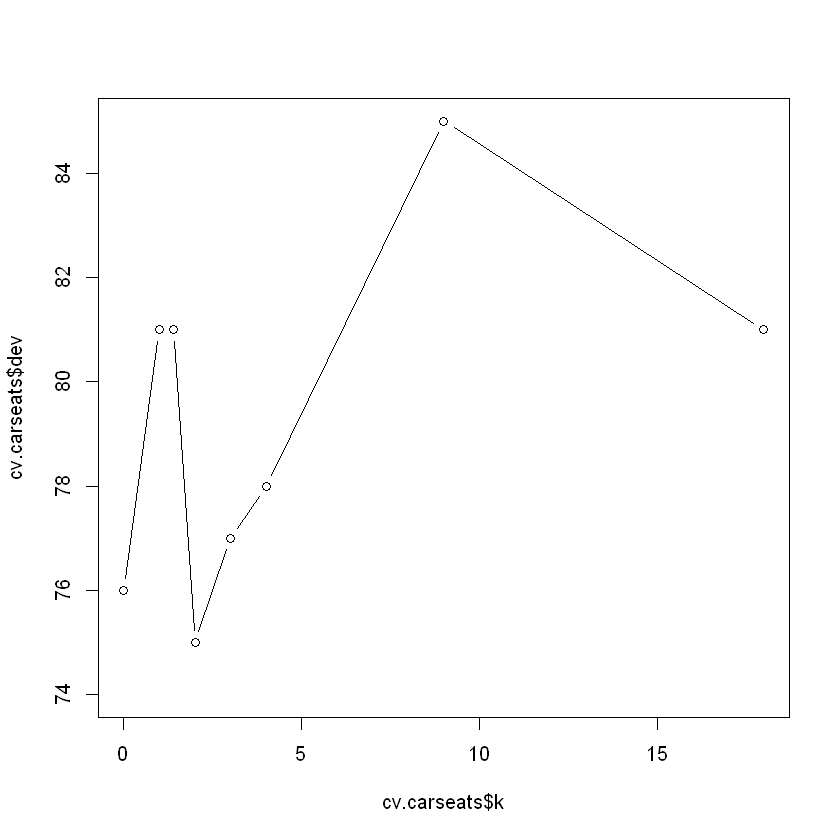

In [22]:
plot(cv.carseats$size ,cv.carseats$dev, type ="b")
plot(cv.carseats$k ,cv.carseats$dev, type ="b")

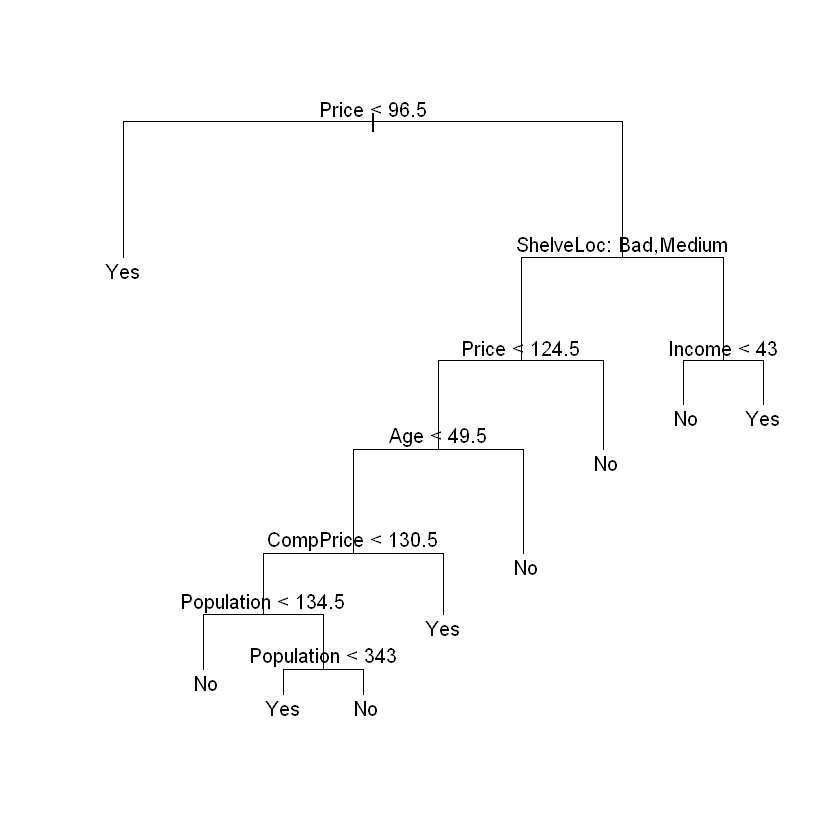

In [23]:
prune.carseats = prune.misclass ( tree.carseats , best =9)
plot( prune.carseats )
text( prune.carseats , pretty =0)

In [25]:
tree.pred = predict ( prune.carseats , Carseats.test , type ="class")
table( tree.pred ,High.test)

         High.test
tree.pred  No  Yes 
     No    97    25
     Yes   20    58